In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data import Data
from GD import (loss,
                g,
                init_w)

In [2]:
data_loader = Data("Rice_Cammeo_Osmancik.arff")
X = data_loader.get_X()
y = data_loader.get_y()
X_normalized = data_loader.normalize_data(X)
X_with_bias = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

In [3]:
X_train, X_test, y_train, y_test = data_loader.split_data(X_with_bias, y, test_size=0.2)

In [4]:
n_features = X_train.shape[1]
w = init_w(n_features)

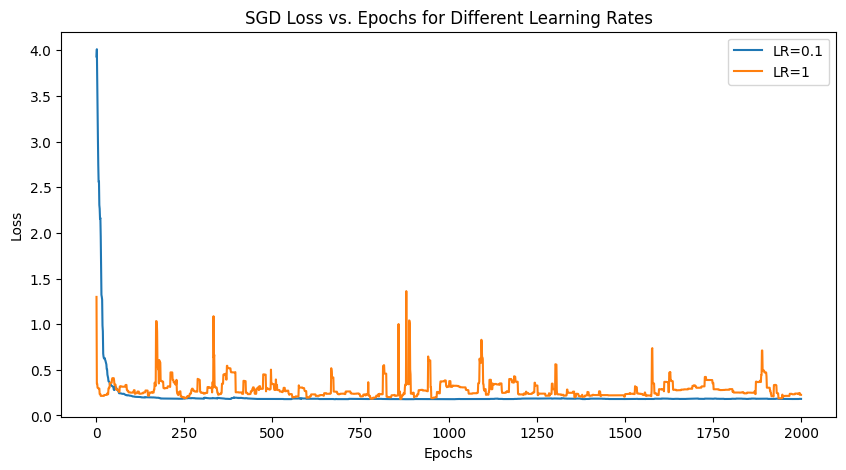

In [5]:
learning_rates = [0.1, 1]
loss_values_by_lr = {}

epochs = 2000

for lr in learning_rates:
    w_sgd_lr = init_w(n_features)
    loss_values_sgd_lr = []
        
    for epoch in range(1, epochs + 1):
        random_sample_index = np.random.choice(X_train.shape[0], 1)
        random_x = X_train[random_sample_index]
        random_y = y_train[random_sample_index]
        
        gradient = g(random_x, random_y, w_sgd_lr)
        w_sgd_lr -= lr * gradient
        
        current_loss = loss(X_train, y_train, w_sgd_lr)
        loss_values_sgd_lr.append(current_loss)
    
    loss_values_by_lr[lr] = loss_values_sgd_lr

# Plotting
plt.figure(figsize=(10, 5))

for lr, losses in loss_values_by_lr.items():
    plt.plot(range(1, len(losses) + 1), losses, label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD Loss vs. Epochs for Different Learning Rates')
plt.legend()
plt.show()


